In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data
df = pd.read_excel("Airline_data_project_AA.xlsx")
df.head()

,Year,Availible Seat Miles (millions),Enplaned Passengers (thousands),departed seats (thousands),Passenger Revenue (millions),Revenue Passenger Miles (RPM) (millions),Passenger Yield (cents per RPM),Passenger Revenue per ASM (Cents per RASM)
0,2000,17315,13525,21942,1577,11987,13.16,9.11
1,2001,17918,13667,22468,1565,12249,12.77,8.73
2,2002,19356,14153,23350,1624,13184,12.32,8.39
3,2003,20921,15070,24159,1794,14573,12.31,8.57
4,2004,22275,16295,25137,1961,16234,12.08,8.80


In [3]:
# Check data types
df.dtypes

Year                                            int64
Availible Seat Miles (millions)                 int64
Enplaned Passengers (thousands)                 int64
departed seats (thousands)                      int64
Passenger Revenue (millions)                    int64
Revenue Passenger Miles (RPM) (millions)        int64
Passenger Yield (cents per RPM)               float64
Passenger Revenue per ASM (Cents per RASM)    float64
dtype: object

In [4]:
df2 = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df2.head()

,Year,Availible Seat Miles (millions),Enplaned Passengers (thousands),departed seats (thousands),Passenger Revenue (millions),Revenue Passenger Miles (RPM) (millions),Passenger Yield (cents per RPM),Passenger Revenue per ASM (Cents per RASM)
0,2000,17315,13525,21942,1577,11987,13.16,9.11
1,2001,17918,13667,22468,1565,12249,12.77,8.73
2,2002,19356,14153,23350,1624,13184,12.32,8.39
3,2003,20921,15070,24159,1794,14573,12.31,8.57
4,2004,22275,16295,25137,1961,16234,12.08,8.80


In [5]:
# Multiply columns by scale to get real numbers
df['Availible Seat Miles (millions)'] = df['Availible Seat Miles (millions)'].apply(lambda x: x*1000000)
df['Passenger Revenue (millions)'] = df['Passenger Revenue (millions)'].apply(lambda x: x*1000000)
df['Revenue Passenger Miles (RPM) (millions)'] = df['Revenue Passenger Miles (RPM) (millions)'].apply(lambda x: x*1000000)
df['departed seats (thousands)'] = df['departed seats (thousands)'].apply(lambda x: x*1000)
df['Enplaned Passengers (thousands)'] = df['Enplaned Passengers (thousands)'].apply(lambda x: x*1000)
df.head()

,Year,Availible Seat Miles (millions),Enplaned Passengers (thousands),departed seats (thousands),Passenger Revenue (millions),Revenue Passenger Miles (RPM) (millions),Passenger Yield (cents per RPM),Passenger Revenue per ASM (Cents per RASM)
0,2000,17315000000,13525000,21942000,1577000000,11987000000,13.16,9.11
1,2001,17918000000,13667000,22468000,1565000000,12249000000,12.77,8.73
2,2002,19356000000,14153000,23350000,1624000000,13184000000,12.32,8.39
3,2003,20921000000,15070000,24159000,1794000000,14573000000,12.31,8.57
4,2004,22275000000,16295000,25137000,1961000000,16234000000,12.08,8.80


In [6]:
# Rename columns for useability
df2 = df.rename(columns={"Year":"year", "Availible Seat Miles (millions)":"availible seat miles (ASM)", 
                         "Enplaned Passengers (thousands)":"enplaned passengers", "departed seats (thousands)": "departed seats", 
                        "Passenger Revenue (millions)": "passenger revenue", 
                         "Revenue Passenger Miles (RPM) (millions)": "revenue passenger miles (RPM)", 
                        "Passenger Yield (cents per RPM)": "passenger yield per RPM in USD", 
                        "Passenger Revenue per ASM (Cents per RASM)": "passenger revenue per ASM (RASM) in USD"})
df2.head()

,year,availible seat miles (ASM),enplaned passengers,departed seats,passenger revenue,revenue passenger miles (RPM),passenger yield per RPM in USD,passenger revenue per ASM (RASM) in USD
0,2000,17315000000,13525000,21942000,1577000000,11987000000,13.16,9.11
1,2001,17918000000,13667000,22468000,1565000000,12249000000,12.77,8.73
2,2002,19356000000,14153000,23350000,1624000000,13184000000,12.32,8.39
3,2003,20921000000,15070000,24159000,1794000000,14573000000,12.31,8.57
4,2004,22275000000,16295000,25137000,1961000000,16234000000,12.08,8.80


In [7]:
df2['%_seats_filled'] = df2['enplaned passengers'] / df2['departed seats'] * 100
df2.head()

,year,availible seat miles (ASM),enplaned passengers,departed seats,passenger revenue,revenue passenger miles (RPM),passenger yield per RPM in USD,passenger revenue per ASM (RASM) in USD,%_seats_filled
0,2000,17315000000,13525000,21942000,1577000000,11987000000,13.16,9.11,61.639778
1,2001,17918000000,13667000,22468000,1565000000,12249000000,12.77,8.73,60.828734
2,2002,19356000000,14153000,23350000,1624000000,13184000000,12.32,8.39,60.612420
3,2003,20921000000,15070000,24159000,1794000000,14573000000,12.31,8.57,62.378410
4,2004,22275000000,16295000,25137000,1961000000,16234000000,12.08,8.80,64.824760


In [8]:
# Save this dataframe to work with in Tableau
df2.to_excel('ADP_clean.xlsx') 

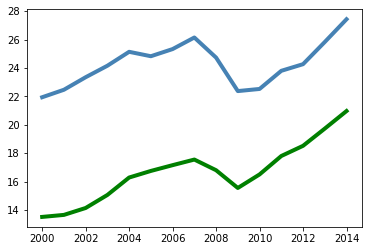

In [9]:
# Look at line chart of departed seats to enplaned seats
# multiple line plots
plt.plot(df2["year"], df2["departed seats"] / 1000000, color='steelblue', linewidth=4)
plt.plot(df2["year"], df2["enplaned passengers"]/ 1000000, color='green', linewidth=4)

# show graph
plt.show()

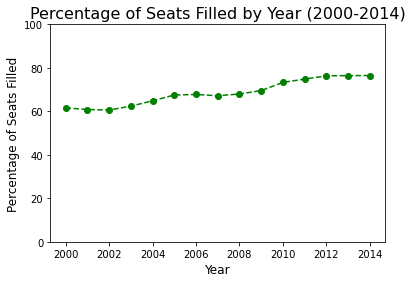

In [10]:
# Look at line graph of percentage of seats filled
plt.figure()
plt.title("Percentage of Seats Filled by Year (2000-2014)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Seats Filled", fontsize=12)
plt.ylim([0, 100])
plt.plot(df2["year"], df2["%_seats_filled"],'go--')

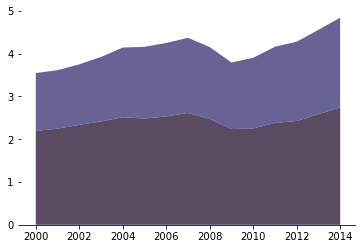

In [15]:
# Create stacked area plot
import seaborn as sns

fig, ax = plt.subplots()

# Remove the right border
right = ax.spines["right"]
right.set_visible(False)

# Remove the top border
top = ax.spines["top"]
top.set_visible(False)

# Remove left border
left = ax.spines["left"]
left.set_visible(False)

# Select a seaborn color palette
pal = sns.color_palette("mako")

plt.stackplot(df2.year, df2["departed seats"] / 10000000, df2["enplaned passengers"] / 10000000,
              labels=['Availible Seats', 'Departed Seats', 'Filled Seats'], colors=pal, alpha=0.8)

#plt.legend(loc='upper left')
#plt.yticks([0, 10000, 20000, 30000, 40000], [0,"$10,000", "$20,000", "$30,000", "USD $40,000"])
#plt.xticks([1984, 1988, 1992, 1996, 2000, 2004, 2008])
#plt.title("Top 5 Annual Expenditures (1984-2008)", size=14)
#plt.xlabel("Year")
#plt.grid(axis='y')

plt.show()

In [49]:
# How many airline miles flown in df2["enplaned passengers"].sum() / 1000000000

250.122

In [31]:
# Read in AA stock data
alk = pd.read_csv("ALK.csv")
alk

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,8.875000,9.000000,8.750000,8.750000,7.868539,900400
1,1/4/2000,8.796875,8.843750,8.625000,8.640625,7.770181,892000
2,1/5/2000,8.703125,8.750000,8.515625,8.687500,7.812334,1016800
3,1/6/2000,8.687500,8.765625,8.531250,8.695313,7.819360,1045200
4,1/7/2000,8.765625,9.078125,8.687500,9.015625,8.107402,1304800
...,...,...,...,...,...,...,...
3767,12/23/2014,57.230000,57.349998,56.419998,56.750000,51.885864,764600
3768,12/24/2014,57.240002,58.840000,57.240002,58.720001,53.687004,629800
3769,12/26/2014,58.750000,59.480000,58.560001,59.020000,53.961292,706300
3770,12/29/2014,58.830002,59.950001,58.560001,59.730000,54.610443,839600


In [33]:
# Convert data into datetime object
alk['Date'] = alk['Date'].apply(lambda _: datetime.strptime(_,"%m/%d/%Y"))
type(alk['Date'])

pandas.core.series.Series

In [28]:
alk.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,8.875000,9.000000,8.750000,8.750000,7.868539,900400
1,2000-01-04,8.796875,8.843750,8.625000,8.640625,7.770181,892000
2,2000-01-05,8.703125,8.750000,8.515625,8.687500,7.812334,1016800
3,2000-01-06,8.687500,8.765625,8.531250,8.695313,7.819360,1045200
4,2000-01-07,8.765625,9.078125,8.687500,9.015625,8.107402,1304800


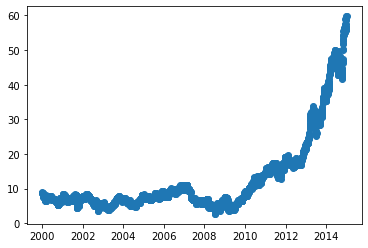

In [34]:
plt.scatter(alk.Date, alk.Close)